![](http://i67.tinypic.com/2jcbwcw.png)


## Prediction 

Author List: 

Sana Iqbal, significant edits for fall 2017

Kevin Li, Ikhlaq Sidhu, Spring 2017

Original Sources: http://scikit-learn.org,http://archive.ics.uci.edu/ml/datasets/Iris
License: Feel free to do whatever you want to with this code


### Our  predictive machine learning models perform two types of tasks:

* __CLASSIFICATION__:
LABELS ARE DISCRETE VALUES.
Here the model is trained to classify each instance into a set of predefined  discrete classes.
On inputting a feature vector into the model, the trained model is able to predict a  class of that instance.

Eg: We train our model using income and expenditure data of bank customers using  __defaulter or non-defaulter__ as labels. When we input income and expenditure data  of any customer in this model, it will predict whether the customer is going to default or not.

* __REGRESSION__:
LABELS ARE CONTINUOUS VALUES.
Here the model is trained to predict a continuous value for each instance.
On inputting a feature vector into the model, the trained model is able to predict a continuous value  for  that instance.

Eg: We train our model using income and expenditure data of bank customers using  __ default amount__ as the label. This model when input with income and expenditure data of any customer will be able to predict the default amount the customer might end up with.


* __TO GET STARTED:__:

We will use python library -SCIKIT-LEARN for our classification and regression models.

1. Install numpy, scipy, scikit-learn.

2. Download the dataset provided and save it in your current working directory.

3. In the following sections  you will:

    3.1 Read the dataset into the python program.
    
    3.2 Look  into the dataset characteristics, check for feature type - categorical or numerical.
    
    3.3 Find feature distributions to check sufficiency of data.
    
    3.4 Divide the dataset into training and validation subsets.
    
    3.5 Fit models with training data  using scikit-learn library.
    
    3.6 Calculate training error,this gives you the idea of bias in your model.
    
    3.7 Test model prediction accuracy using validation data,this gives you bias and variance error in the model.
    
    3.8 Report model performance on validation data using different metrics.
    
    3.9 Save the model parameters in a pickle file so that it can be used for test data.
    
  Also, if our data set is small we will have fewer examples for validation.
This will not give us a a good estimatiion of model error.
We can use  k-fold crossvalidation in such situations.
In k-fold cross-validation, the shuffled training data is partitioned into k disjoint sets and the model is trained on k −1 sets and validated on the kth set. This process is repeated k times with each set
chosen as the validation set once. The cross-validation accuracy is reported as the average accuracy
of the k iterations





In [1]:
import numpy as np
import pandas as pd 
import matplotlib.pyplot as plt

### ASSUMPTIONS:
### > Problem:
'Iris 'setosa' species has medicinal benefits and we want to make the process of identifying an iris species scalable'  

### > Type: 
Classification
### > Data : 
Flower morphology data collected by floriculture department


## CLASSIFICATION

In [2]:

file_path='iris_classification.csv'
data=pd.read_csv(file_path)


In [3]:
# lets us look at the data
data.head()

,sepal_length,sepal_width,species
0,5.1,3.5,setosa
1,4.9,3.0,setosa
2,4.7,3.2,setosa
3,4.6,3.1,setosa
4,5.0,3.6,setosa


In [4]:
# lets us check unique labels:
data['species'].value_counts()

versicolor    50
virginica     50
setosa        50
Name: species, dtype: int64

In [6]:

# SHUFFLE data instances to randomize the distribution of different classes
# Check if data has any NAN  values, you can choose to drop NAN 
# containing rows or replace NAN  values with mean. median,or any assumed value.

data= shuffle(data).reset_index(drop=True)



NameError: name 'shuffle' is not defined

In [7]:
print('Number of NaNs in the dataframe:\n',data.isnull().sum())
data.head()


Number of NaNs in the dataframe:
 sepal_length    0
sepal_width     0
species         0
dtype: int64


,sepal_length,sepal_width,species
0,5.1,3.5,setosa
1,4.9,3.0,setosa
2,4.7,3.2,setosa
3,4.6,3.1,setosa
4,5.0,3.6,setosa


In [8]:
# Our functions take in features and labels as arrays  so I can separate them :GET FEATURES FROM THE DATA
X=data.iloc[:,:-1]
X.head()

,sepal_length,sepal_width
0,5.1,3.5
1,4.9,3.0
2,4.7,3.2
3,4.6,3.1
4,5.0,3.6


In [9]:
# GET LABELS FROM THE DATA
Y=data['species']


print (Y.value_counts()) #gives the count of each label in the dataset



versicolor    50
virginica     50
setosa        50
Name: species, dtype: int64


In [10]:

print ('''\nWe will map our class labels to integers and then use in modeling.
The mapping is:'versicolor': 0, 'virginica': 1,'setosa' :2 \n''')

Y=Y.map({'versicolor': 0, 'virginica': 1,'setosa' :2})
print (Y.value_counts()) #gives the count of each label in the dataset

Y.head()



We will map our class labels to integers and then use in modeling.
The mapping is:'versicolor': 0, 'virginica': 1,'setosa' :2 

2    50
1    50
0    50
Name: species, dtype: int64


0    2
1    2
2    2
3    2
4    2
Name: species, dtype: int64

In [11]:
# should do sanity check on data often
print("Feature vector shape=", X.shape)
print("Class shape=", Y.shape)


Feature vector shape= (150, 2)
Class shape= (150,)


In [12]:
# More summary about our data
data.describe()

,sepal_length,sepal_width
count,150.000000,150.000000
mean,5.843333,3.054000
std,0.828066,0.433594
min,4.300000,2.000000
25%,5.100000,2.800000
50%,5.800000,3.000000
75%,6.400000,3.300000
max,7.900000,4.400000


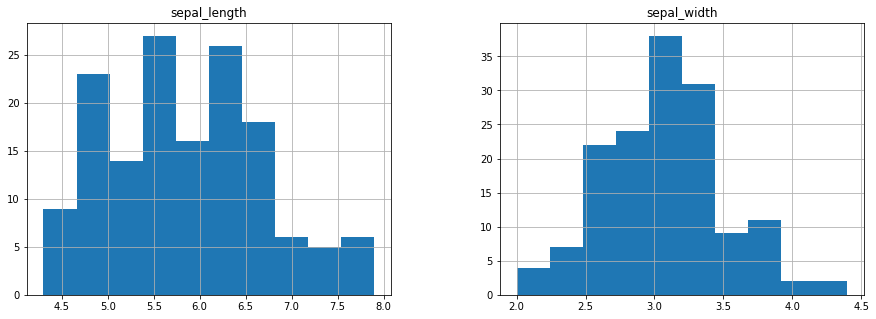

In [13]:
# Get feature distribution of each ontinuous valued feature
data.hist(figsize=(15,5))
plt.show()

            sepal_length  sepal_width
species                              
setosa                50           50
versicolor            50           50
virginica             50           50


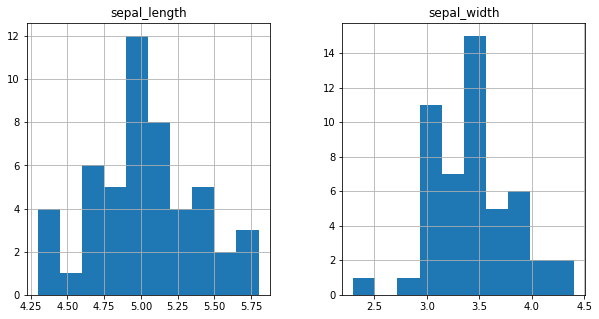

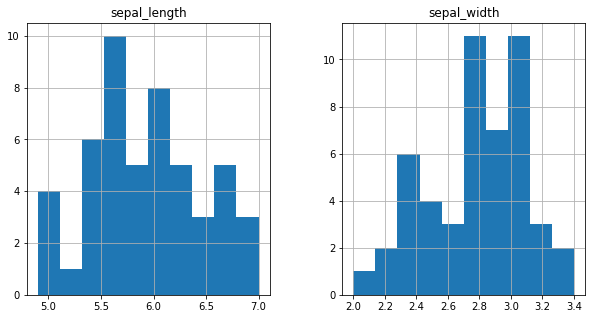

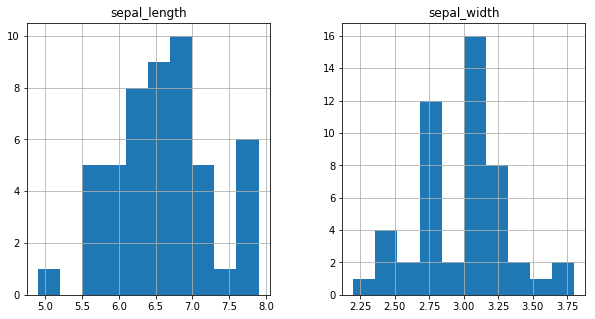

In [14]:
# Check feature distribution of each class, to get an overview of feature and class relationshhip,
# also useful in validating data
print(data.groupby('species').count())


data.groupby('species').hist(figsize=(10,5))
plt.show()




### Our Hypothesis : Species of Iris is dependent on sepal length and width of the flower.
### USE SKLEARN INBUILT FUNCTION TO BUILD A LOGISTIC REGRESSION MODEL  
For Details check :
http://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LogisticRegression.html#sklearn.linear_model.LogisticRegression.fit

In order to check the validity of our trained model, we keep a part of our dataset hidden from the model during training, called  __Validation data__.

Validation data labels are predicted using the trained model and compared with the actual labels of the data.This gives us the idea about how well the model can be trusted for its predictive power.

In [16]:
# Split data into training and validation set  using sklearn function

from sklearn.model_selection import train_test_split

x_train, x_test, y_train, y_test = train_test_split(X, Y, test_size=0.2, random_state=100)
print ('Number of samples in training data:',len(x_train))
print ('Number of samples in validation data:',len(x_test))



Number of samples in training data: 120
Number of samples in validation data: 30


#### Train Model

In [17]:
from sklearn import linear_model

# Name our logistic regression object
LogisticRegressionModel = linear_model.LogisticRegression()

# we create an instance of logistic Regression Classifier and fit the data.
print ('Training a logistic Regression Model..')
LogisticRegressionModel.fit(x_train, y_train)

Training a logistic Regression Model..


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False)

#### Test Model -----Training Accuracy and Test Accuracy
##  
#### TRAINING ACCURACY

In [19]:
# TRAINING ACCURACY

training_accuracy=LogisticRegressionModel.score(x_train,y_train)
print ('Training Accuracy:',training_accuracy)
#or


Training Accuracy: 0.758333333333


In [20]:
# Lets us see how it is done ab-initio. Estimate prediction error logically for each sample 
# and save it in an array called Loss_Array


# this line below will predict a category for every row in x_train
predicted_label = LogisticRegressionModel.predict(x_train) 

    

def find_error(actual_label,predicted_label):
    '''actual_label= label in data
        predicted_label= label predicted by the model
        
    '''
    
    Loss_Array = np.zeros(len(actual_label)) #create an empty array to store loss values
#     print(Loss_Array)
    
    for i,value in enumerate(actual_label):
        
        if value == predicted_label[i]: 
            Loss_Array[i] = 0
        else:
            Loss_Array[i] = 1

    print ("Y-actualLabel   Z-predictedLabel   Error \n")
    for i,value in enumerate(actual_label):
        print (value,"\t\t" ,predicted_label[i],"\t\t",Loss_Array[i])
        
    error_rate=np.average(Loss_Array)
    print ("\nThe error rate is ", error_rate)
    print ('\nThe accuracy of the model is ',1-error_rate )
    
    
find_error(y_train,predicted_label)


Y-actualLabel   Z-predictedLabel   Error 

0 		 0 		 0.0
0 		 0 		 0.0
1 		 0 		 1.0
2 		 2 		 0.0
2 		 2 		 0.0
0 		 1 		 1.0
2 		 2 		 0.0
0 		 0 		 0.0
1 		 0 		 1.0
1 		 0 		 1.0
2 		 0 		 1.0
0 		 0 		 0.0
1 		 1 		 0.0
1 		 1 		 0.0
2 		 2 		 0.0
2 		 2 		 0.0
2 		 2 		 0.0
2 		 2 		 0.0
0 		 0 		 0.0
2 		 2 		 0.0
2 		 2 		 0.0
2 		 2 		 0.0
0 		 1 		 1.0
1 		 1 		 0.0
1 		 0 		 1.0
0 		 2 		 1.0
1 		 0 		 1.0
0 		 0 		 0.0
1 		 1 		 0.0
1 		 1 		 0.0
0 		 0 		 0.0
2 		 2 		 0.0
1 		 1 		 0.0
1 		 1 		 0.0
1 		 0 		 1.0
2 		 2 		 0.0
2 		 2 		 0.0
1 		 0 		 1.0
2 		 2 		 0.0
2 		 2 		 0.0
2 		 2 		 0.0
0 		 1 		 1.0
1 		 1 		 0.0
1 		 1 		 0.0
1 		 0 		 1.0
2 		 2 		 0.0
0 		 2 		 1.0
0 		 0 		 0.0
2 		 2 		 0.0
0 		 1 		 1.0
0 		 0 		 0.0
1 		 0 		 1.0
2 		 2 		 0.0
0 		 0 		 0.0
0 		 0 		 0.0
0 		 0 		 0.0
0 		 1 		 1.0
0 		 0 		 0.0
0 		 0 		 0.0
1 		 0 		 1.0
1 		 0 		 1.0
2 		 2 		 0.0
0 		 0 		 0.0
2 		 2 		 0.0
0 		 0 		 0.0
1 		 1 		 0.0
1 		 1 		 0.0
1 		 0 		 1.0
0 		 

####  VALIDATION ACCURACY: 

In [21]:
# VALIDATION ACCURACY: 
# we will find accuracy of the model 
# using data that was not used for training the model

validation_accuracy=LogisticRegressionModel.score(x_test,y_test)
print('Accuraacy of the model on unseen validation data: ',validation_accuracy)


Accuraacy of the model on unseen validation data:  0.8


In [22]:

from sklearn.metrics import confusion_matrix
y_true = y_test
y_pred = LogisticRegressionModel.predict(x_test)
ConfusionMatrix=pd.DataFrame(confusion_matrix(y_true, y_pred),columns=['Predicted 0','Predicted 1','Predicted 2'],index=['Actual 0','Actual 1','Actual 2'])
print ('Confusion matrix of test data is: \n',ConfusionMatrix)


Confusion matrix of test data is: 
           Predicted 0  Predicted 1  Predicted 2
Actual 0            4            2            0
Actual 1            4            9            0
Actual 2            0            0           11


In [25]:
# PLOT THE DECISION BOUNDARIES:
# 1.create meshgrid of all points between 

'''
For that we will create a mesh between [x_min, x_max]x[y_min, y_max].
We will choose a 2d vector space ranging from values +- 0.5 from our 
min and max values of sepal_length and sepal_width.
Then we will divide that whole region in a grid of  0.02 units cell size.

'''

h = 0.02  # step size in the mesh
x_min = X['sepal_length'].min() - .5
x_max = X['sepal_length'].max() + .5
y_min = X['sepal_width'].min() - .5
y_max = X['sepal_width'].max() + .5



# print x_min, x_max, y_min, y_max

sepal_length_range = np.arange(x_min, x_max, h)
sepal_width_range = np.arange(y_min, y_max, h)


# Create datapoints for the mesh
sepal_length_values, sepal_width_values = np.meshgrid(sepal_length_range, sepal_width_range)


# Predict species for the fictious data in meshgrid
predicted_species = LogisticRegressionModel.predict(np.c_[sepal_length_values.ravel(), sepal_width_values.ravel()])


print ('Finished predicting species')

# another approach is to make an array Z2 which has all the predicted values in (xr,yr).  

predicted_species2= np.arange(len(sepal_length_range)*len(sepal_width_range)).reshape(len(sepal_length_range),len(sepal_width_range))
for yni in range(len(sepal_width_range)):
    for xni in range(len(sepal_length_range)):
#         print (xni, yni, LogisticRegressionModel.predict([[xr[xni],yr[yni]]]))

        predicted_species2[xni,yni] =LogisticRegressionModel.predict([[sepal_length_range[xni],sepal_width_range[yni]]])
print ('Finished predicted_species2')





Finished predicting species
Finished predicted_species2


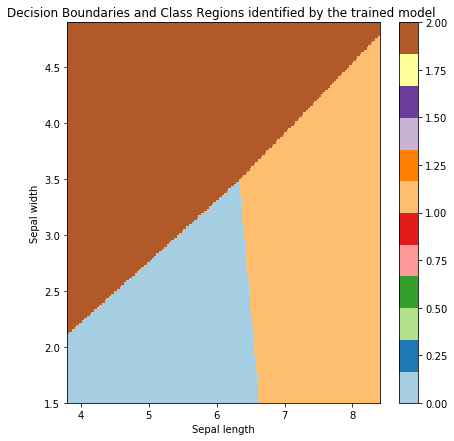

In [26]:
# Put the result into a color plot
predicted_species = predicted_species.reshape(sepal_length_values.shape)
plt.figure(figsize=(7,7))
plt.xlabel('Sepal length')
plt.ylabel('Sepal width')
plt.pcolormesh(sepal_length_values,sepal_width_values,predicted_species , cmap=plt.cm.Paired)
plt.title('Decision Boundaries and Class Regions identified by the trained model ')
plt.colorbar()
plt.show()


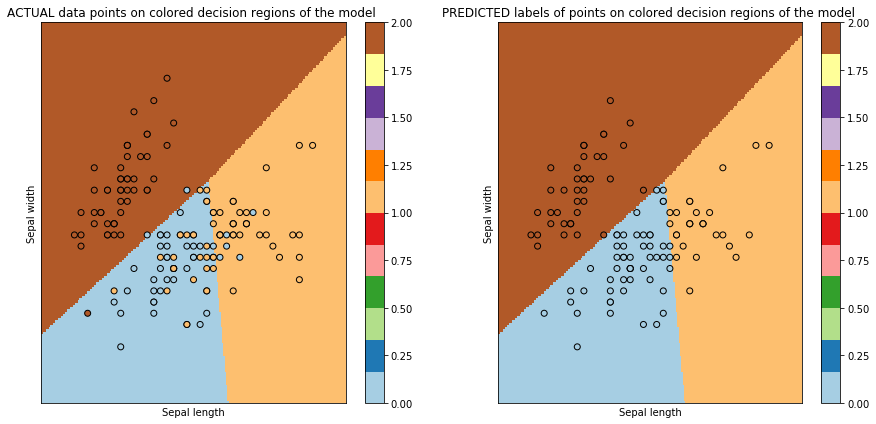

In [27]:
# Plot also the training points

fig, ax = plt.subplots(nrows=1,ncols=2,figsize=(15,7))

plt.subplot(1,2,1)
plt.pcolormesh(sepal_length_values,sepal_width_values,predicted_species , cmap=plt.cm.Paired)

plt.scatter(X['sepal_length'], X['sepal_width'], c=Y, edgecolors='k', cmap=plt.cm.Paired)
plt.xlabel('Sepal length')
plt.ylabel('Sepal width')
plt.colorbar()
plt.xlim(sepal_length_values.min(),sepal_length_values.max())
plt.ylim(sepal_width_values.min(), sepal_width_values.max())
plt.xticks(())
plt.yticks(())
plt.title('ACTUAL data points on colored decision regions of the model ')

# Put the result into a color plot of decison boundary

plt.subplot(1,2,2)
plt.title('PREDICTED labels of points on colored decision regions of the model ')
plt.pcolormesh(sepal_length_values,sepal_width_values,predicted_species, cmap=plt.cm.Paired)
plt.colorbar()
label=np.unique(y_test)

plt.scatter(x_train['sepal_length'], x_train['sepal_width'], c=pd.DataFrame(predicted_label), edgecolors='k', cmap=plt.cm.Paired)
plt.xlabel('Sepal length')
plt.ylabel('Sepal width')

plt.xlim(sepal_length_values.min(),sepal_length_values.max())
plt.ylim(sepal_width_values.min(), sepal_width_values.max())
plt.xticks(())
plt.yticks(())



plt.show()

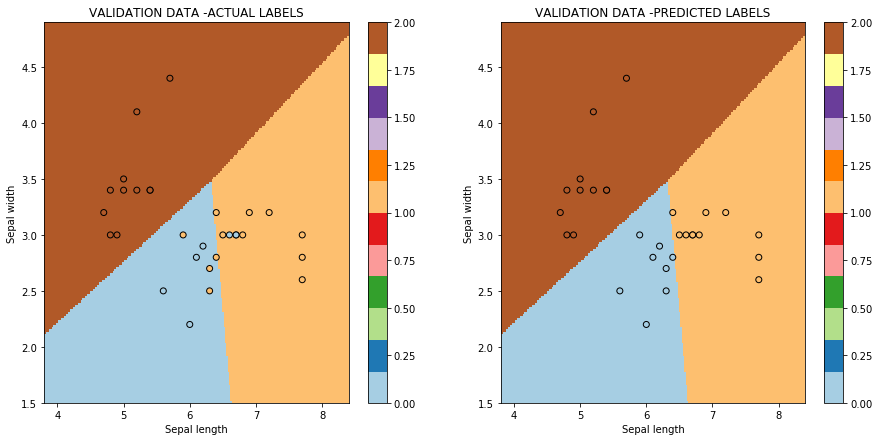

In [28]:

fig, ax = plt.subplots(nrows=1,ncols=2,figsize=(15,7))

plt.subplot(1,2,1)
plt.pcolormesh(sepal_length_values,sepal_width_values,predicted_species, cmap=plt.cm.Paired)
plt.colorbar()
label=np.unique(y_test)
plt.title('VALIDATION DATA -ACTUAL LABELS')
# Plot also the training points
plt.scatter(x_test['sepal_length'], x_test['sepal_width'], c=y_test,label=np.unique(y_test), edgecolors='k', cmap=plt.cm.Paired)
plt.xlabel('Sepal length')
plt.ylabel('Sepal width')


plt.subplot(1,2,2)
plt.pcolormesh(sepal_length_values,sepal_width_values,predicted_species, cmap=plt.cm.Paired)
plt.colorbar()
# Plot also the training points
plt.scatter(x_test['sepal_length'], x_test['sepal_width'], c=LogisticRegressionModel.predict(x_test), edgecolors='k', cmap=plt.cm.Paired)
plt.xlabel('Sepal length')
plt.ylabel('Sepal width')
plt.title('VALIDATION DATA -PREDICTED LABELS')


plt.show()

## Simple Linear Regression Example

__Linear regression__ is a predictive modeling technique for predicting a numeric response variable based on features.  
"Linear" in the name linear regression refers to the fact that this method fits a model where response bears linear relationship with features. (ie Z is proportional to first power of x)

__Z = X0 + a(X1) + b(X2) +.... where:__   
Z: predicted response  
X0: intercept  
a,b,..: Coefficients of X1,X2..  

If Y is the actual response and Z is the predicted response,    
__Y-Z= Residual__  
Average Residual defines model performance,residual equal to zero represents a perfect fit model.


In [ ]:
'''Source: Scikit learn
Code source: Jaques Grobler
License: BSD 3 clause'''
from sklearn import linear_model

example_dff = pd.DataFrame(np.random.randint(0,100,size=(100, 1)),columns=['X'])
example_dff['C']=5.1*example_dff['X']
# example_dff['C']=5.1*example_dff['X']**2




X_reg=example_dff[['X']]

Y_reg=example_dff['C']

# Create linear regression object
LinearRegressionModel= linear_model.LinearRegression()

# Train the model using the training sets
LinearRegressionModel.fit(X_reg, Y_reg)
Z_reg=LinearRegressionModel.predict(X_reg)

# The coefficients
print('Coefficients:', LinearRegressionModel.coef_)
# The mean squared error
print("Mean squared error:",np.mean((Z_reg - Y_reg) ** 2))

# Plot outputs
plt.scatter(X_reg['X'], Y_reg,  color='red')
plt.plot(X_reg['X'], Z_reg, color='blue',
         linewidth=3)
plt.xlabel('X')
plt.ylabel('Y')
plt.title('Linear Regression using data with one feature -X')
plt.xticks(())
plt.yticks(())

plt.show()